Boston Marathon runners are most appropriately divided into 4 clusters according to Kmeans Clustering. This algorithm provides that smallest standard deviation using Silhouette analysis among clusters when the data is randomly quartered. However, the algorithm itself has a relatively high standard deviation when predicting a single training set. 

From the data we can surmise that most runners belong to one cluster (17,521/31649 = 55.36%) with males making up the majority of that group (9358/17521 = 53.41%). The smallest cluster contained only 264 runners (.83%) with 85.98% of those runners being male.

#Question I still have: Is there an easy way to tell which cluster represents which group? 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy
import seaborn as sns

In [48]:
df= pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv')
df.head(3)
print (df.dtypes)

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object


In [41]:
df.gender.head(3)

0    M
1    F
2    M
Name: gender, dtype: object

## Turning data into numbers

In [42]:
df_num = pd.DataFrame()

df_num['official int'] = pd.to_numeric(df['official'], errors='coerce')
df_num['half int'] = pd.to_numeric(df['half'], errors='coerce')
df_num['age int'] = pd.to_numeric(df['age'], errors='coerce')
df_num['pace int']=pd.to_numeric(df['pace'], errors = 'coerce')
df_num['10k int']= pd.to_numeric(df['10k'], errors = 'coerce')
df_num['division'] = df['division']
df_num['25k int'] =pd.to_numeric(df['25k'], errors = 'coerce')
df_num['genderdiv int'] = pd.to_numeric(df['genderdiv'], errors = 'coerce')
df_num['35k int'] = pd.to_numeric(df['35k'], errors = 'coerce')
df_num['overall int'] = df['overall']
df_num['5k int'] = pd.to_numeric(df['5k'], errors = 'coerce')    
df_num['30k int']  = pd.to_numeric(df['30k'], errors = 'coerce')     
df_num['20k int'] = pd.to_numeric(df['20k'], errors = 'coerce')    
df_num['40k int']  = pd.to_numeric(df['40k'], errors = 'coerce')

                                    
  
print (df_num.dtypes)

official int     float64
half int         float64
age int            int64
pace int         float64
10k int          float64
division           int64
25k int          float64
genderdiv int      int64
35k int          float64
overall int        int64
5k int           float64
30k int          float64
20k int          float64
40k int          float64
dtype: object


In [0]:
df_num['gender']= df.gender.replace(to_replace = 'M', value = 0).replace(to_replace = 'F', value = 1)
df_num.gender.head(3)
df_num = df_num.dropna()

In [0]:
# df_num = pd.concat([df_num, df['country'].str.get_dummies(sep=',')], axis=1)
# df_num = df_num.dropna()

In [49]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31649 entries, 0 to 31983
Data columns (total 15 columns):
official int     31649 non-null float64
half int         31649 non-null float64
age int          31649 non-null int64
pace int         31649 non-null float64
10k int          31649 non-null float64
division         31649 non-null int64
25k int          31649 non-null float64
genderdiv int    31649 non-null int64
35k int          31649 non-null float64
overall int      31649 non-null int64
5k int           31649 non-null float64
30k int          31649 non-null float64
20k int          31649 non-null float64
40k int          31649 non-null float64
gender           31649 non-null int64
dtypes: float64(10), int64(5)
memory usage: 3.9 MB


In [0]:
X = df_num[['official int', 'pace int', 'age int', 'division', 'overall int']]
y = df_num['gender']

In [0]:
#This is a critical step in getting a more accurate crosstab
#y= np.where(y>0, 0,1)

## Kmeans

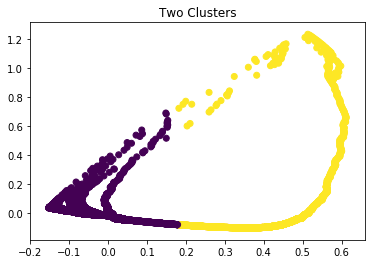

Crosstab: gender      0      1
row_0               
0       14153  14131
1        3331     34
Stdev: 0.30824990840124844


In [55]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans

X_norm = normalize(X)

X_pca = PCA(2).fit_transform(X_norm)

y_pred = KMeans(n_clusters = 2, random_state = 42).fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:,1], c=y_pred)
plt.title('Two Clusters')
plt.show()

print('Crosstab:', pd.crosstab(y_pred, y))
print ('Stdev:', y_pred.std())




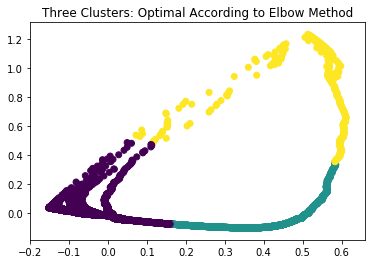

Stdev: 0.348090005845548
Crosstab: gender      0      1
row_0               
0       14048  14128
1        3205      0
2         231     37


In [56]:


y_pred = KMeans(n_clusters = 3, random_state = 42).fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:,1], c=y_pred)

plt.title('Three Clusters: Optimal According to Elbow Method')
plt.show()
print ('Stdev:', y_pred.std())
print('Crosstab:', pd.crosstab(y_pred, y))



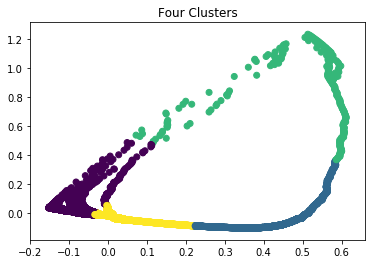

Stdev: 1.3857306549958779
Crosstab: gender     0     1
row_0             
0       9358  8163
1       2952     0
2        227    37
3       4947  5965


In [58]:


y_pred = KMeans(n_clusters = 4, random_state = 42).fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:,1], c=y_pred)
plt.title('Four Clusters')
plt.show()
print ('Stdev:', y_pred.std())
print('Crosstab:', pd.crosstab(y_pred, y))

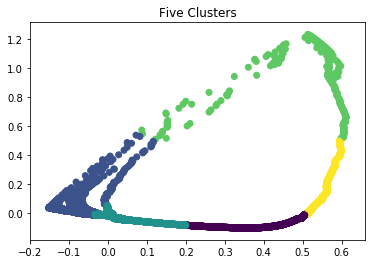

Stdev: 0.6993561955853309
Crosstab: gender     0     1
row_0             
0       2592     0
1       9198  8137
2       5029  5992
3        180    36
4        485     0


In [59]:

y_pred = KMeans(n_clusters = 5, random_state = 42).fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:,1], c=y_pred)
plt.title('Five Clusters')
plt.show()
print ('Stdev:', y_pred.std())
print('Crosstab:', pd.crosstab(y_pred, y))


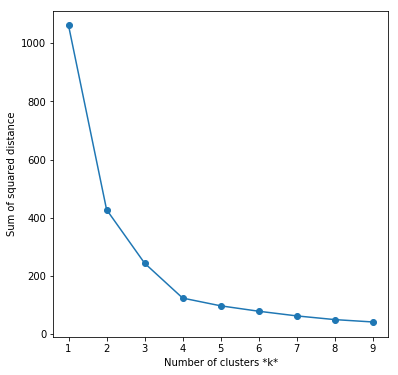

In [60]:

#Elbow Method evaluation

sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_pca)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

Four clusters appears to be best

In [0]:
#Don't have the memory to run RI

# # Note: the itertools module is tons of fun and very useful.
# import itertools

# # Create a list of pairs, where each pair is the ground truth group
# # and the assigned cluster.
# c = list(itertools.product(y, y_pred))

# # Count how often each type of pair (a, b, c, or d) appears.
# RIcounts = [[x, c.count(x)] for x in set(c)]
# print(RIcounts)

# # Create the same counts but without the label, for easier math below.
# RIcounts_nolabel = [c.count(x) for x in set(c)]

# # Calculate the Rand Index.
# RIscore = (RIcounts_nolabel[3] + RIcounts_nolabel[2]) / np.sum(RIcounts_nolabel)
# print(RIscore)

In [61]:
# Try ARI?

from sklearn import metrics
    
metrics.adjusted_rand_score(y, y_pred)

0.008556722820148688

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.9, random_state=42)

In [0]:
#Set up for Silhouette: Dividing the data into 4ths

from sklearn.model_selection import train_test_split

X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)


X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)


In [65]:
#KMeans: Checking consistency of coefficients for 3 clusters with Silhouette 

from sklearn import metrics
from sklearn.metrics import pairwise_distances
import statistics as sts

sil_3 = []

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=3, random_state=42).fit(sample)
    labels = model.labels_
    sil_3.append(metrics.silhouette_score(sample, labels, metric='euclidean'))
    
print(sil_3)
print(sts.stdev(sil_3))

[0.7758944391771403, 0.7782599665878386, 0.7762479087316129, 0.7810499324761893]
0.002366282075529708


In [66]:
#KMeans: Checking consistency of coefficients for 4 clusters with Silhouette

from sklearn import metrics
from sklearn.metrics import pairwise_distances

sil_4 = []

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=4, random_state=42).fit(sample)
    labels = model.labels_
    sil_4.append(metrics.silhouette_score(sample, labels, metric='euclidean'))
    
print(sil_4)
print(sts.stdev(sil_4))

[0.6314764899138506, 0.6351988730170198, 0.6323652007058245, 0.6355450372437715]
0.002030186958991663


#KMeans conclusion: 4 clusters slightly better than 3

Based on elbow and silhouette analysis

## Mean Shift

In [67]:
#Number of clusters depends heavily on which sample you use in the 
#bandwidth definition. 
#X_train = 7
#X_pca = 6
#X1 = 5
#X2 = 4
#X3 = 3
#X4 = 4


from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X_train, quantile = .2, n_samples = 500)

ms = MeanShift(bandwidth = bandwidth, bin_seeding = True)
ms.fit(X_train)

MeanShift(bandwidth=0.07083044676082843, bin_seeding=True, cluster_all=True,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [68]:

#extracting assignments for each data point
labels = ms.labels_

#coordinates of center clusters
cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

print ('Num. estimated clusters:', n_clusters_)

Num. estimated clusters: 20


In [0]:
y_pred_ms = ms.fit_predict(X_pca)

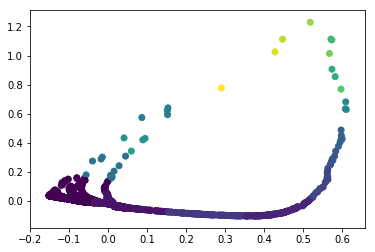

Stdev: 1.251552430764315


In [70]:
plt.scatter(X_train[:,0], X_train[:, 1], c= labels)
plt.show()
print ('Stdev:', y_pred_ms.std())


In [76]:

from sklearn import metrics
    
metrics.adjusted_rand_score(#what can I put here)

ValueError: ignored

In [71]:
#Meanshift: Checking consistency of coefficients for 7 clusters with Silhouette

sil_20 = []

for sample in [X1, X2, X3, X4]:
    model = ms.fit(sample)
    labels = model.labels_
    sil_20.append(metrics.silhouette_score(sample, labels, metric='euclidean'))
    
print(sil_20)
print(sts.stdev(sil_20))

[0.6321888829771477, 0.6359906292184591, 0.6308072730900295, 0.6298966768689281]
0.0026840415837009798


Silhouette suggests that Mean Shift performs worse than kmeans (higher stdev). 20 clusters used for Mean Shift compared to 4 (and 3) for Kmeans. The appearance of the plot suggests unequal clusters

## Spectral Clustering

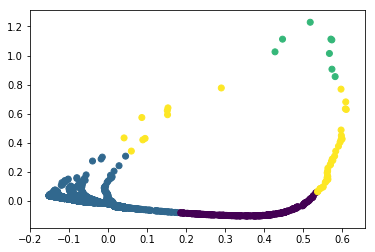

Stdev: 0.3856588399163413


In [74]:
from sklearn.cluster import SpectralClustering

# compare 4 clusters to the 4 clusters of kmean
n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()


print ('Stdev:', predict.std())

In [75]:
sil_spec = []

for sample in [X1, X2, X3, X4]:
    model = sc.fit(sample)
    labels = model.labels_
    sil_spec.append(metrics.silhouette_score(sample, labels, metric='euclidean'))
    
print(sil_spec)
print(sts.stdev(sil_spec))

[0.7667500799518636, 0.7701063208416715, 0.7735315546942685, 0.7757602784198375]
0.0039486611835549655


Silhouette shows Spectral Clustering to have the higher stdev compared to the kmeans model, but the clustering shows better distribution than mean shift.

## Affinity Propagation

In [76]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics


af = AffinityPropagation().fit(X_train)



cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Estimated number of clusters: 2415


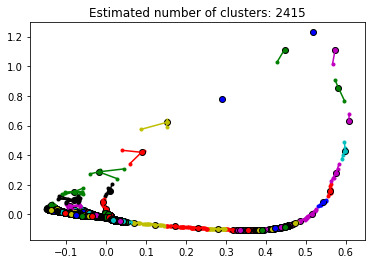

In [77]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

In [78]:
#This will run forever

sil_ap = []

for sample in [X1, X2, X3, X4]:
    model = af.fit(sample)
    labels = model.labels_
    sil_ap.append(metrics.silhouette_score(sample, labels, metric='euclidean'))
    
print(sil_ap)
print(sts.stdev(sil_ap))

[0.16987173193367716, 0.0977295364683423, 0.0745287581309583, 0.10040664622780746]
0.041165605866939084


Silhouette shows highest standard deviation of all the models. So much overlap in the clusters as well and an outrageous amount of clusters to boot (typical of Affinity Propagation)